11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8473 - loss: 0.5293 - val_accuracy: 0.9657 - val_loss: 0.1273
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9607 - loss: 0.1296 - val_accuracy: 0.9707 - val_loss: 0.0977
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9733 - loss: 0.0898 - val_accuracy: 0.9753 - val_loss: 0.0885
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9811 - loss: 0.0645 - val_accuracy: 0.9750 - val_loss: 0.0872
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9837 - loss: 0.0520 - val_accuracy: 0.9775 - val_loss: 0.0795
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9898 - loss: 0.0340 - val_accuracy: 0.9778 - val_loss: 0.0798
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9773 - val_loss: 0.0882
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9923 - loss: 0.0234 - val_accuracy: 0

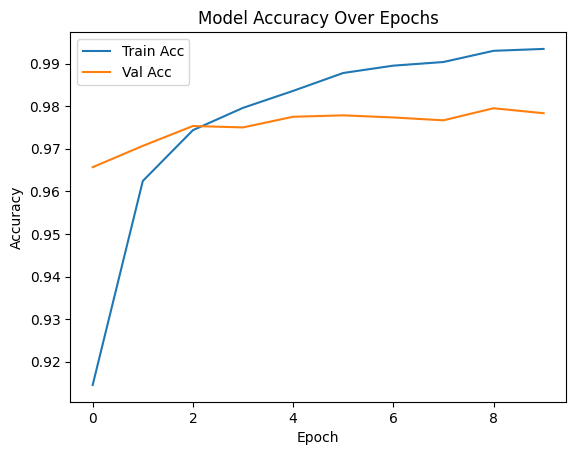

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


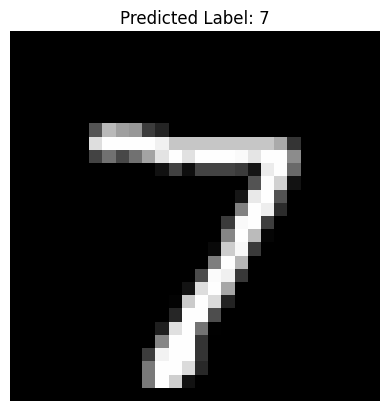

In [1]:
# Step 1: Install and import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 2: Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize input images
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),   # input layer
    Dense(128, activation='relu'),   # hidden layer
    Dense(64, activation='relu'),    # hidden layer
    Dense(10, activation='softmax')  # output layer
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Step 6: Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", round(test_acc * 100, 2), "%")

# Step 7: Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Step 8: Predict on one sample
sample_index = 0
sample_image = X_test[sample_index]
prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(prediction)

plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()
